In [3]:
from google.colab import files
uploaded = files.upload()

Saving events.csv to events.csv
Saving example.csv to example.csv
Saving pages.csv to pages.csv


In [603]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Data Preprocessing

In [604]:
events = pd.read_csv("events.csv")


In [605]:
pages = pd.read_csv("pages.csv")
example = pd.read_csv("example.csv")


In [606]:
pages

,trackTime,userId,page
0,1.615350e+09,2acefd2c-8a82-4e1d-8aff-044522455633,Campaign 2 - Landing Page
1,1.615350e+09,2acefd2c-8a82-4e1d-8aff-044522455633,Ironing: Learn More Page
2,1.615351e+09,58691bae-d6ef-4f18-be62-fe071baddf0b,Campaign 1 - Landing Page
3,1.615351e+09,58691bae-d6ef-4f18-be62-fe071baddf0b,Cleaning: Booking First Page
4,1.615351e+09,58691bae-d6ef-4f18-be62-fe071baddf0b,Home Page
...,...,...,...
3368,1.618177e+09,cc9127f6-1f3d-433c-abfc-55a3408ba45f,Error Page
3369,1.618177e+09,cc9127f6-1f3d-433c-abfc-55a3408ba45f,Campaign 2 - Landing Page
3370,1.618177e+09,cc9127f6-1f3d-433c-abfc-55a3408ba45f,Error Page
3371,1.618185e+09,8c0d1ec9-e547-4d6d-b068-4240e2f5b751,Campaign 2 - Landing Page


In [607]:
events

,trackTime,userId,event
0,1.615350e+12,2acefd2c-8a82-4e1d-8aff-044522455633,Learn More
1,1.615350e+12,58691bae-d6ef-4f18-be62-fe071baddf0b,Share in WhatsApp
2,1.615351e+12,58691bae-d6ef-4f18-be62-fe071baddf0b,Cleaning: Book Now
3,1.615351e+12,58691bae-d6ef-4f18-be62-fe071baddf0b,Menu: Home
4,1.615351e+12,58691bae-d6ef-4f18-be62-fe071baddf0b,Address Input
...,...,...,...
3089,1.617186e+12,2cede939-00ea-4543-b99a-fadc3fe37c4f,Select: 3 hours
3090,1.617186e+12,2cede939-00ea-4543-b99a-fadc3fe37c4f,Start at: 01:30 PM
3091,1.617186e+12,2cede939-00ea-4543-b99a-fadc3fe37c4f,Booking Summary
3092,1.617186e+12,2cede939-00ea-4543-b99a-fadc3fe37c4f,Enter Phone Number


In [608]:
example

,trackTime,userId,event
0,1617039624,ce2dac97-46f6-4f01-b6a3-b57d825df10d,Campaign 2 - Landing Page
1,1617039641,ce2dac97-46f6-4f01-b6a3-b57d825df10d,Cooking: Book Now
2,1617039646,ce2dac97-46f6-4f01-b6a3-b57d825df10d,Select Region: Lahore
3,1617039665,ce2dac97-46f6-4f01-b6a3-b57d825df10d,Address Input
4,1617039672,ce2dac97-46f6-4f01-b6a3-b57d825df10d,See Available Slots
5,1617039686,ce2dac97-46f6-4f01-b6a3-b57d825df10d,Select Helper: Female
6,1617039690,ce2dac97-46f6-4f01-b6a3-b57d825df10d,Select: 2 hours
7,1617039714,ce2dac97-46f6-4f01-b6a3-b57d825df10d,Select: 3 hours
8,1617039720,ce2dac97-46f6-4f01-b6a3-b57d825df10d,Select: 4 hours
9,1617039723,ce2dac97-46f6-4f01-b6a3-b57d825df10d,Start at 10:30 AM


In [609]:
events["time"] = pd.to_datetime(events['trackTime'],unit='ms') #converting the UNIX time format to UTC Timestamps and putting them into another column of the dataframe
pages["time"] = pd.to_datetime(pages['trackTime'],unit='s')


In [610]:
pages.drop('trackTime', axis=1, inplace=True) #Dropping the trackTime with UNIX time format
events.drop('trackTime', axis=1, inplace=True)

In [611]:
pages

,userId,page,time
0,2acefd2c-8a82-4e1d-8aff-044522455633,Campaign 2 - Landing Page,2021-03-10 04:17:25
1,2acefd2c-8a82-4e1d-8aff-044522455633,Ironing: Learn More Page,2021-03-10 04:17:30
2,58691bae-d6ef-4f18-be62-fe071baddf0b,Campaign 1 - Landing Page,2021-03-10 04:30:45
3,58691bae-d6ef-4f18-be62-fe071baddf0b,Cleaning: Booking First Page,2021-03-10 04:30:50
4,58691bae-d6ef-4f18-be62-fe071baddf0b,Home Page,2021-03-10 04:31:12
...,...,...,...
3368,cc9127f6-1f3d-433c-abfc-55a3408ba45f,Error Page,2021-04-11 21:37:17
3369,cc9127f6-1f3d-433c-abfc-55a3408ba45f,Campaign 2 - Landing Page,2021-04-11 21:38:21
3370,cc9127f6-1f3d-433c-abfc-55a3408ba45f,Error Page,2021-04-11 21:38:23
3371,8c0d1ec9-e547-4d6d-b068-4240e2f5b751,Campaign 2 - Landing Page,2021-04-11 23:46:20


In [612]:
pages.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,userId,page,time
count,3371,3369,3334
unique,1052,26,3318
top,495eafd7-46ba-4d11-887b-5e8aa24bc24e,Campaign 2 - Landing Page,2021-04-07 06:56:35
freq,44,721,3
first,NaN,NaN,2021-03-10 04:17:25
last,NaN,NaN,2021-04-11 23:46:22


In [613]:
events.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,userId,event,time
count,3093,3090,3045
unique,545,44,3045
top,82fa23d4-deae-4bf9-8e3c-a9da17fbda1a,Menu: Services,2021-03-20 02:36:45.879000
freq,56,480,1
first,NaN,NaN,2021-03-10 04:17:29.023000
last,NaN,NaN,2021-03-31 10:16:15.885000


In [614]:
pages.isnull().sum() #checking the null values in pages.csv


userId     2
page       4
time      39
dtype: int64

In [615]:
events.isnull().sum()

userId     1
event      4
time      49
dtype: int64

The count of the null values is low as compared to the whole dataset so it is better drop them for the further analysis.

In [616]:
events = events.dropna()
pages = pages.dropna()

In [617]:
pages.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,userId,page,time
count,3328,3328,3328
unique,1049,26,3312
top,495eafd7-46ba-4d11-887b-5e8aa24bc24e,Campaign 2 - Landing Page,2021-04-07 06:56:35
freq,44,719,3
first,NaN,NaN,2021-03-10 04:17:25
last,NaN,NaN,2021-04-11 23:46:22


In [618]:
events.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,userId,event,time
count,3040,3040,3040
unique,542,44,3040
top,82fa23d4-deae-4bf9-8e3c-a9da17fbda1a,Menu: Services,2021-03-20 02:36:45.879000
freq,56,472,1
first,NaN,NaN,2021-03-10 04:17:29.023000
last,NaN,NaN,2021-03-31 10:16:15.885000


# Data Visulisation and analysis

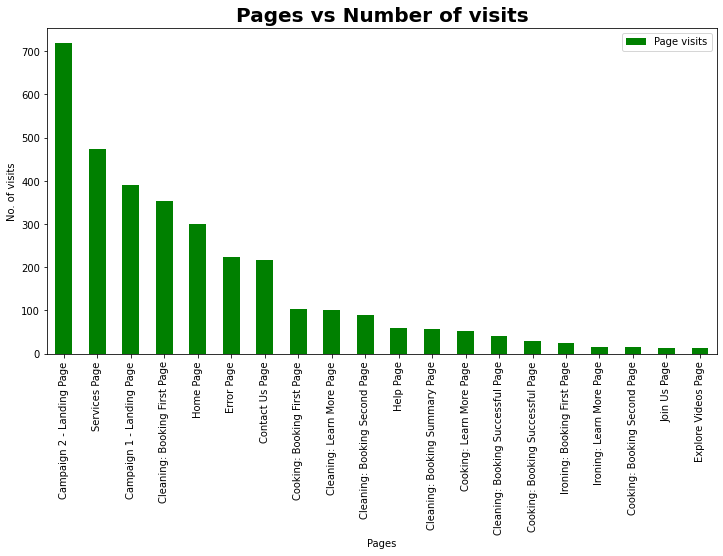

In [619]:
plt.figure(figsize = (12,6))
ax = pages.page.value_counts()[:20].plot(kind = 'bar', color= 'green')
ax.legend(['Page visits'])
plt.xlabel("Pages")
plt.ylabel("No. of visits")
plt.title("Pages vs Number of visits",fontsize =20, weight = 'bold')
plt.savefig('Pages vs Number of visits')

From the above graph we can see that the Campaign 2 - Landing page had more visits as compared to the Campaign 1 - Landing Page.

Campaign 1 needs to be checked - why are less people coming from this landing page as compared to the other landing page.

In [620]:
pages['page'].value_counts()

Campaign 2 - Landing Page            719
Services Page                        473
Campaign 1 - Landing Page            391
Cleaning: Booking First Page         353
Home Page                            301
Error Page                           223
Contact Us Page                      217
Cooking: Booking First Page          104
Cleaning: Learn More Page            101
Cleaning: Booking Second Page         90
Help Page                             59
Cleaning: Booking Summary Page        58
Cooking: Learn More Page              52
Cleaning: Booking Successful Page     41
Cooking: Booking Successful Page      29
Ironing: Booking First Page           25
Ironing: Learn More Page              16
Cooking: Booking Second Page          15
Join Us Page                          14
Explore Videos Page                   13
Cooking: Booking Summary Page         11
Ironing: Booking Second Page           7
FAQ Page                               5
Watch Now Page                         4
Ironing: Booking

We know that the booking is only possible if the user reaches the Booking Successful Page.

- Cleaning: Booking Successful Page     41
- Cooking: Booking Successful Page      29
- Ironing: Booking Successful Page       3

total number of bookings = 
49 + 29 + 3 = 73 bookings

In [621]:
df = pages["time"].max() - pages["time"].min() #total time spent by the users on the platform
df2 = events["time"].max() - events["time"].min() #total time spent by the users on the actions/steps

df3 = df + df2
print(df3)

54 days 01:27:43.862000


In [622]:
import re
def validate_if_campaign(x): #Created a function in order to search for the campaigns in the page column
    services = ["ironing","cleaning","cooking"]
    for service in services:
        if re.search(service, x, re.IGNORECASE):
            return service
    return "other"
pages["services"] = pages["page"].apply(lambda x: validate_if_campaign(x)) #Created a new column for the 3 campiagn and others
page_userids = pages["userId"].unique().tolist()

pages.sort_values(['time'], ascending=[True], inplace=True)
pages_c = pages.copy()
# page_gb = pages.groupby(['userId','time']).sum()
spent_time = pages_c['time'] - pages_c['time'].shift(1)
spent_time = list(spent_time[1:])+[None]
pages_c["spent_time"] = spent_time
pages_c = pages_c[["services","spent_time"]]
pages_c.groupby(['services']).sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,spent_time
services,
cleaning,4 days 06:09:44
cooking,1 days 15:11:47
ironing,4 days 11:02:11
other,22 days 11:05:15


In [623]:
import re
def validate_if_campaign(x): #Created a function in order to search for the campaigns in the page column
    campaigns = ["Campaign 2 - Landing Page","Campaign 1 - Landing Page"]
    for campaign in campaigns:
        if re.search(campaign, x, re.IGNORECASE):
            return campaign
    return "other"
pages["campaigns"] = pages["page"].apply(lambda x: validate_if_campaign(x)) #Created a new column for the 3 campiagn and others
page_userids = pages["userId"].unique().tolist()

pages.sort_values(['time'], ascending=[True], inplace=True)
pages_c = pages.copy()
# page_gb = pages.groupby(['userId','time']).sum()
spent_time = pages_c['time'] - pages_c['time'].shift(1)
spent_time = list(spent_time[1:])+[None]
pages_c["spent_time"] = spent_time
pages_c = pages_c[["campaigns","spent_time"]]
pages_c.groupby(['campaigns']).sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,spent_time
campaigns,
Campaign 1 - Landing Page,2 days 03:11:15
Campaign 2 - Landing Page,4 days 10:50:34
other,26 days 05:27:08


Campaign 2 has the longest campaign time as compared to Campaign 1 - Landing page.

In [624]:
events.head()

,userId,event,time
0,2acefd2c-8a82-4e1d-8aff-044522455633,Learn More,2021-03-10 04:17:29.023
1,58691bae-d6ef-4f18-be62-fe071baddf0b,Share in WhatsApp,2021-03-10 04:27:46.571
2,58691bae-d6ef-4f18-be62-fe071baddf0b,Cleaning: Book Now,2021-03-10 04:30:49.181
3,58691bae-d6ef-4f18-be62-fe071baddf0b,Menu: Home,2021-03-10 04:31:11.519
4,58691bae-d6ef-4f18-be62-fe071baddf0b,Address Input,2021-03-10 04:33:46.424


In [625]:
events.event.unique()

array(['Learn More', 'Share in WhatsApp', 'Cleaning: Book Now',
       'Menu: Home', 'Address Input', 'Menu: Services',
       'Select Region: Lahore', 'See Available Slots',
       'Select Helper: Female', 'Select: 3 hours', 'Menu: Contact Us',
       'Start at: 11:00 AM', 'Booking Summary', 'Start at: 10:00 AM',
       'Enter Phone Number', 'Complete Booking', 'Back',
       'Select Helper: Male', 'Ironing: Book Now', 'Get Help',
       'Select: 2 hours', 'Cooking: Book Now', 'Start at: 01:00 PM',
       'Start at: 03:00 PM', 'Start at: 01:30 PM', 'Explore Videos',
       'Watch Now', 'FAQs', 'Select: 4 hours', 'Select Region: Islamabad',
       'Join Us', 'Start at: 12:00 PM', 'Start at: 02:00 PM',
       'Start at: 02:30 PM', 'Select: 6 hours', 'Select: 5 hours',
       'Select: 7 hours', 'Start at: 11:30 AM', 'Start at: 04:00 PM',
       'Start at: 10:30 AM', 'Connect on Messenger',
       'Select Region: Rawalpindi', 'Select: 8 hours',
       'Start at: 03:30 PM'], dtype=object)

In [626]:
events['event'] = events['event'].astype(str) #converting event column into string

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [627]:
import re
def validate_if_spef_event(x): #function to check the specific event
    spef_event = ['Learn More', 'Share in WhatsApp', 'Cleaning: Book Now',
       'Menu: Home', 'Address Input', 'Menu: Services',
       'Select Region: Lahore', 'See Available Slots',
       'Select Helper: Female', 'Select: 3 hours', 'Menu: Contact Us',
       'Start at: 11:00 AM', 'Booking Summary', 'Start at: 10:00 AM',
       'Enter Phone Number', 'Complete Booking', 'Back',
       'Select Helper: Male', 'Ironing: Book Now', 'Get Help',
       'Select: 2 hours', 'Cooking: Book Now', 'Start at: 01:00 PM',
       'Start at: 03:00 PM', 'Start at: 01:30 PM', 'Explore Videos',
       'Watch Now', 'FAQs', 'Select: 4 hours', 'Select Region: Islamabad',
       'Join Us', 'Start at: 12:00 PM', 'Start at: 02:00 PM',
       'Start at: 02:30 PM', 'Select: 6 hours', 'Select: 5 hours',
       'Select: 7 hours', 'Start at: 11:30 AM', 'Start at: 04:00 PM',
       'Start at: 10:30 AM', 'Connect on Messenger',
       'Select Region: Rawalpindi', 'Select: 8 hours', 'nan',
       'Start at: 03:30 PM']
    for event in spef_event:
        if re.search(event, x, re.IGNORECASE):
            return event
    return "other"
events["spef_event"] = events["event"].apply(lambda x: validate_if_spef_event(x))
event_userids = events["userId"].unique().tolist()

events.sort_values(['time'], ascending=[True], inplace=True)
events_c = events.copy()
# page_gb = pages.groupby(['userId','time']).sum()
spent_time = events_c['time'] - events_c['time'].shift(1)
spent_time = list(spent_time[1:])+[None]
events_c["spent_time"] = spent_time
events_c = events_c[["spef_event","spent_time"]]
events_c.groupby(['spef_event']).sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,spent_time
spef_event,
Address Input,0 days 08:41:33.424000
Back,0 days 07:25:49.265000
Booking Summary,0 days 05:55:21.595000
Cleaning: Book Now,0 days 19:05:21.657000
Complete Booking,1 days 21:42:10.466000
Connect on Messenger,0 days 16:00:46.945000
Cooking: Book Now,0 days 19:11:32.838000
Enter Phone Number,0 days 02:52:09.645000
Explore Videos,0 days 01:33:53.710000


In [628]:
events_c[["spef_event","spent_time"]].groupby(["spef_event"]).sum().sort_values(['spent_time'], ascending=[True]) #Arranging in ascending order

,spent_time
spef_event,
Start at: 11:30 AM,0 days 00:00:02.209000
Start at: 03:30 PM,0 days 00:00:07.161000
Select: 6 hours,0 days 00:00:09.056000
Select: 8 hours,0 days 00:00:10.720000
Start at: 10:30 AM,0 days 00:00:20.969000
Start at: 03:00 PM,0 days 00:00:29.107000
Start at: 04:00 PM,0 days 00:00:35.549000
Start at: 02:30 PM,0 days 00:00:36.160000
Start at: 01:00 PM,0 days 00:00:37.894000


Most time spent by the users on these 3 steps/actions -

 1) 3 days 12:48:16.177000 on the Menu: Services.\
 2) 3 days 12:30:35.728000 on the Learn More.\
 3) 2 days 05:32:41.645000 on the Get Help


It clearly shows that the users are having trouble in navigating the platform.

In [629]:
import re
def validate_if_booking(x): #function to search for the successful booking page
    bookings = ["Ironing: Booking Successful Page","Cooking: Booking Successful Page","Cleaning: Booking Successful Page"]
    for booking in bookings:
        if re.search(booking, x, re.IGNORECASE):
            return booking
    return "other"

pages_b = pages.copy()
pages_b["bookings"] = pages["page"].apply(lambda x: validate_if_booking(x))

In [630]:
pages_b.groupby(['bookings','userId']).sum()

page  ...                                          campaigns
bookings                          userId                                                                                   ...                                                   
Cleaning: Booking Successful Page 0a486672-8de4-47d3-be46-320c1d8e4b08  Cleaning: Booking Successful PageCleaning: Boo...  ...                               otherotherotherother
                                  132b2b1c-ee8a-41ef-8bbc-892547648e16                  Cleaning: Booking Successful Page  ...                                              other
                                  17eda4f8-ec89-46e3-bd16-225cc3c26f27                  Cleaning: Booking Successful Page  ...                                              other
                                  18a1062f-1fdd-46f0-b35a-9eb5770a7a2b  Cleaning: Booking Successful PageCleaning: Boo...  ...                                         otherother
                                  41500506-5201-4bca-ad98-0ab0b710f32e                  Cleaning: Booking Successful Page  ...                                              other
...                                                                                                                   ...  ...                                                ...
other                             fe4101c5-95fd-414f-ba1f-be47b96570d0    Campaign 1 - Landing PageServices PageHome Page  ...                Campaign 1 - Landing Pageotherother
                                  fec45e5d-c22e-4eb4-b604-1204848cd9bb  Campaign 1 - Landing PageCleaning: Learn More ...  ...           Campaign 1 - Landing Pageotherotherother
                                  ff4fe32a-a8fc-497d-bf57-7e75c3fb4596                Campaign 2 - Landing PageError Page  ...                     Campaign 2 - Landing Pageother
                                  ff5ddd13-b6cc-4ca8-b1fe-5c942764a5a9             Campaign 2 - Landing PageServices Page  ...                     Campaign 2 - Landing Pageother
                                  ff727b75-9aff-43e2-864c-c513025456a7  Campaign 1 - Landing PageServices PageCleaning...  ...  Campaign 1 - Landing Pageotherotherotherothero...

[1078 rows x 3 columns]

In [631]:
pages_b['bookings'] = pages_b['bookings'].str.replace('Cleaning: Booking Successful Page','booked') #replacing all the successful booking pages to the word booked

In [632]:
pages_b['bookings'] = pages_b['bookings'].str.replace('Cooking: Booking Successful Page','booked')

In [633]:
pages_b['bookings'] = pages_b['bookings'].str.replace('Ironing: Booking Successful Page','booked')

In [634]:
pages_b.head()

,userId,page,time,services,campaigns,bookings
0,2acefd2c-8a82-4e1d-8aff-044522455633,Campaign 2 - Landing Page,2021-03-10 04:17:25,other,Campaign 2 - Landing Page,other
1,2acefd2c-8a82-4e1d-8aff-044522455633,Ironing: Learn More Page,2021-03-10 04:17:30,ironing,other,other
2,58691bae-d6ef-4f18-be62-fe071baddf0b,Campaign 1 - Landing Page,2021-03-10 04:30:45,other,Campaign 1 - Landing Page,other
3,58691bae-d6ef-4f18-be62-fe071baddf0b,Cleaning: Booking First Page,2021-03-10 04:30:50,cleaning,other,other
4,58691bae-d6ef-4f18-be62-fe071baddf0b,Home Page,2021-03-10 04:31:12,other,other,other


In [635]:
pages_b = pages_b.groupby(['userId','time','bookings']).sum() 
print(pages_b)

                                                                                             page  ...                  campaigns
userId                               time                bookings                                  ...                           
00199b58-2875-47a6-bcc6-eeb30e7575a2 2021-03-25 08:49:29 other          Campaign 1 - Landing Page  ...  Campaign 1 - Landing Page
015395a0-0401-462b-9eee-47a6c0af549a 2021-03-19 10:40:43 other          Campaign 2 - Landing Page  ...  Campaign 2 - Landing Page
                                     2021-03-19 10:40:52 other       Cleaning: Booking First Page  ...                      other
                                     2021-03-19 10:41:06 other                      Services Page  ...                      other
                                     2021-03-19 10:41:14 other       Cleaning: Booking First Page  ...                      other
...                                                                                       

In [636]:
pages_b = pages_b.query('bookings=="booked"').groupby(['userId','bookings']).size().reset_index(name='count') #Checking how many bookings each user has made
print (pages_b)

                                  userId bookings  count
0   0a486672-8de4-47d3-be46-320c1d8e4b08   booked      4
1   132b2b1c-ee8a-41ef-8bbc-892547648e16   booked      1
2   17eda4f8-ec89-46e3-bd16-225cc3c26f27   booked      1
3   18a1062f-1fdd-46f0-b35a-9eb5770a7a2b   booked      2
4   2cede939-00ea-4543-b99a-fadc3fe37c4f   booked      2
5   41500506-5201-4bca-ad98-0ab0b710f32e   booked      1
6   495eafd7-46ba-4d11-887b-5e8aa24bc24e   booked     25
7   49f9d4df-6921-4dde-9227-2fb5bc74f76e   booked      2
8   52be2487-209f-4ef8-87af-37fd172032fb   booked      1
9   5953d2c4-ab5c-4282-aeda-2321d46d6b2d   booked      2
10  671f0516-d2e6-452c-bd36-6a4964eea436   booked      1
11  6c084ead-635e-46db-836d-63d667264a2b   booked      3
12  70da102f-1222-469d-96d9-6e6e2ad3d354   booked      1
13  7204a21c-b73b-4ac3-9ca3-8911c75c6567   booked      1
14  7ace7208-d08d-4dc0-812d-c0c3df6f59b0   booked      1
15  7e44f561-17b5-4a30-b3d2-0bed05b2c2a3   booked      2
16  82fa23d4-deae-4bf9-8e3c-a9d

userId - 495eafd7-46ba-4d11-887b-5e8aa24bc24e made 25 bookings which is the highest. \
Total number of completed bookings = 73


In [637]:
events.pivot_table(columns=['userId'], aggfunc='size') #Checking the unique users

userId
015395a0-0401-462b-9eee-47a6c0af549a     8
0153be36-325f-4d0b-b23f-2e8db26c7179     1
019ba6ec-1c1a-4e43-ae94-4524d6ed15e7     4
01aaa65f-65a5-4ac4-bcb4-1687d9ece15a    13
0281b511-0cd4-4f8b-9e37-2d5192adff70     1
                                        ..
fcb4b46c-931d-49e0-88e9-f58fca09e8e4     2
fe4101c5-95fd-414f-ba1f-be47b96570d0     2
fec45e5d-c22e-4eb4-b604-1204848cd9bb     4
ff5ddd13-b6cc-4ca8-b1fe-5c942764a5a9     1
ff727b75-9aff-43e2-864c-c513025456a7    23
Length: 542, dtype: int64

Number of repeated users are 542